In [117]:
# [1] 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import graphviz


In [118]:
# 데이터 로딩
data_file='./Obesity_Complete.csv'
df = pd.read_csv(data_file)

In [119]:
# [2] 데이터 전처리
# 결측치 처리
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # 간단한 처리방식, 상황에 따라 대체(impute) 가능

In [120]:
# 피처와 타겟 분리
X = df.iloc[:, [i for i in range(df.shape[1]) if i not in [0, 1, 2, 3, 4, 17]]]
y = df['BMI']

In [121]:
X

,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0,2.0,3.0,1,0,2.00,0,0.00,1.000,0,1
1,1,0,3.0,3.0,1,1,3.00,1,3.00,0.000,1,1
2,1,0,2.0,3.0,1,0,2.00,0,2.00,1.000,2,1
3,0,0,3.0,3.0,1,0,2.00,0,2.00,0.000,2,2
4,0,0,2.0,1.0,1,0,2.00,0,0.00,0.000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,1,3.0,3.0,1,0,1.73,0,1.68,0.906,1,1
2107,1,1,3.0,3.0,1,0,2.01,0,1.34,0.599,1,1
2108,1,1,3.0,3.0,1,0,2.05,0,1.41,0.646,1,1
2109,1,1,3.0,3.0,1,0,2.85,0,1.14,0.586,1,1


In [122]:
# [3] 탐색적 데이터 분석 (EDA)
print(df.describe())

            Gender          Age       Height       Weight          BMI  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.494079    24.315964     1.701620    86.586035    29.703255   
std       0.500083     6.357078     0.093368    26.191163     8.016007   
min       0.000000    14.000000     1.450000    39.000000    12.998298   
25%       0.000000    20.000000     1.630000    65.470000    24.325802   
50%       0.000000    23.000000     1.700000    83.000000    28.731747   
75%       1.000000    26.000000     1.770000   107.430000    35.954953   
max       1.000000    61.000000     1.980000   173.000000    50.816933   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     0.883941     2.418986     2.685651   
std                          0.386247     0.320371     0.533996     0.778079   
min          

In [123]:
# [4] 데이터 분리 및 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
# [5] 모델 학습
dt_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_regressor.fit(X_train_scaled, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

In [125]:
# [6] 모델 평가 및 성능 비교
y_train_pred = dt_regressor.predict(X_train_scaled)
y_test_pred = dt_regressor.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {train_rmse:.4f},  Train R²score: {train_r2:.4f}')
print(f'Test  RMSE: {test_rmse:.4f},  Test  R²score: {test_r2:.4f}')

rmse_diff = train_rmse - test_rmse
r2_diff = train_r2 - test_r2
print('-------------------------------------------')
print(f'diff  RMSE: {rmse_diff:.4f}, diff  R²score: {r2_diff:.4f}')




Train RMSE: 2.5696,  Train R²score: 0.8965
Test  RMSE: 4.7669,  Test  R²score: 0.6533
-------------------------------------------
diff  RMSE: -2.1973, diff  R²score: 0.2432


In [126]:
# 과적합 여부 체크
if abs(train_r2 - test_r2) > 0.1:
    print("과적합 가능성이 있습니다. 모델 튜닝이 필요합니다.")

과적합 가능성이 있습니다. 모델 튜닝이 필요합니다.


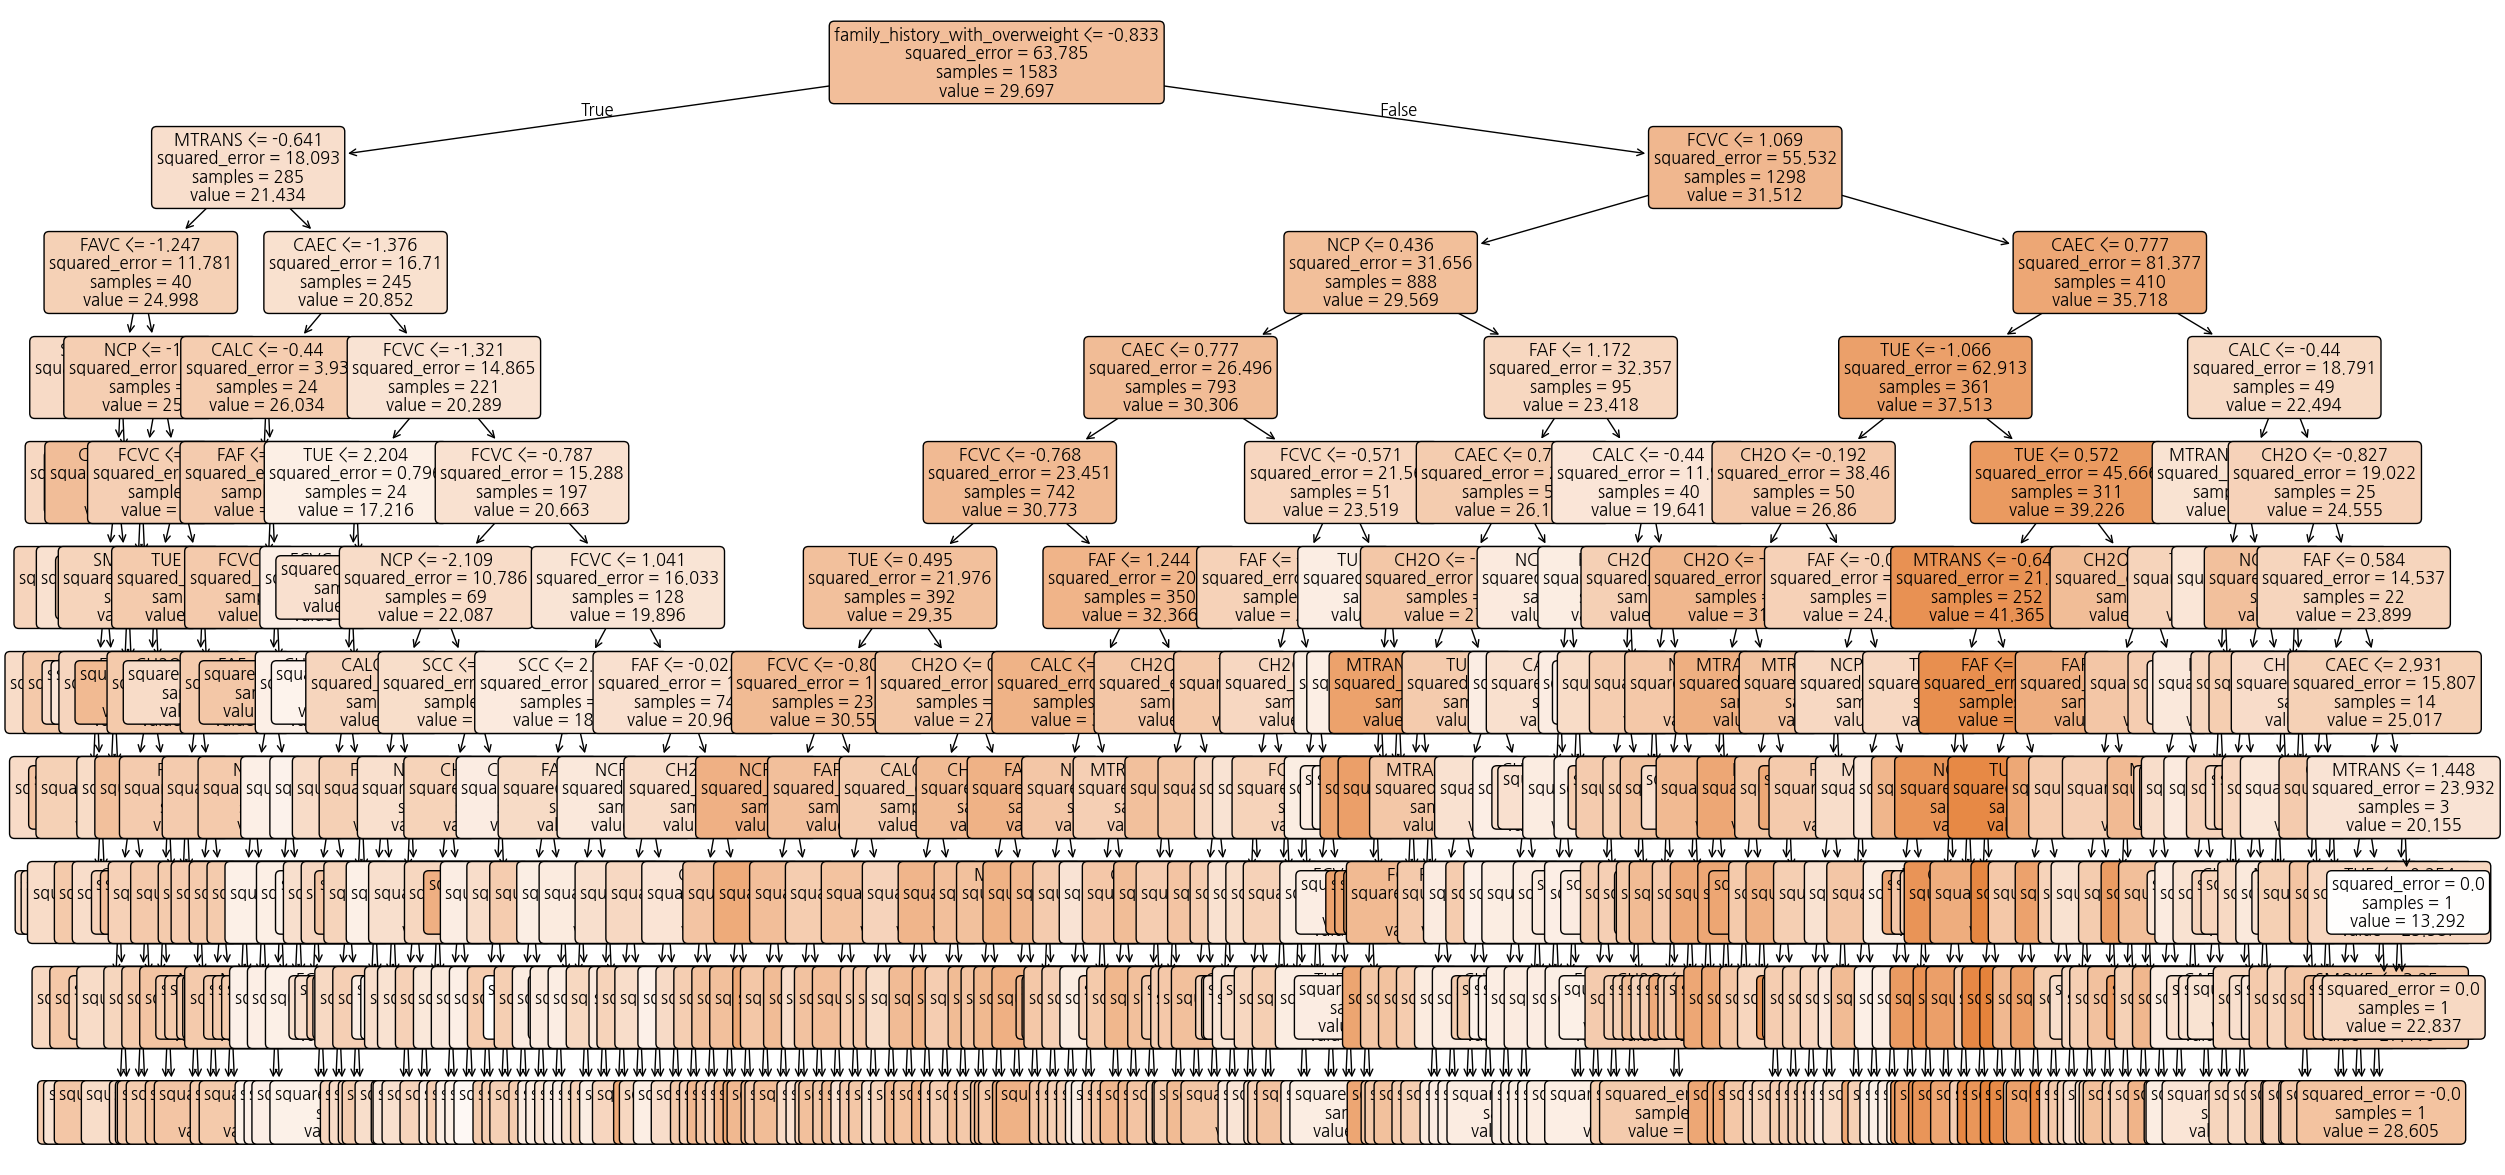

In [127]:
# [7] 모델 시각화
plt.figure(figsize=(30,15))
plot_tree(dt_regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.savefig('decision_tree_visualization.png', dpi=300)
plt.show()

In [128]:
# [8] 최종 결과 분석
result_df = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'RMSE': [train_rmse, test_rmse],
    'R2 Score': [train_r2, test_r2]
})

print(result_df)

  Dataset      RMSE  R2 Score
0   Train  2.569572  0.896485
1    Test  4.766889  0.653334


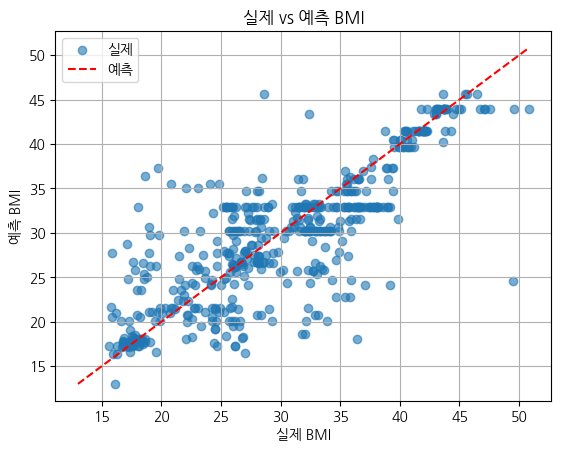

In [129]:
## 실제값과 예측값 비교 플롯 (Scatter Plot)
import koreanize_matplotlib

plt.scatter(y_test, y_test_pred, alpha=0.6, label='실제')
plt.xlabel('실제 BMI')
plt.ylabel('예측 BMI')
plt.title('실제 vs 예측 BMI')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='예측')  # 완벽한 예측 라인
plt.legend()
plt.grid()
plt.show()


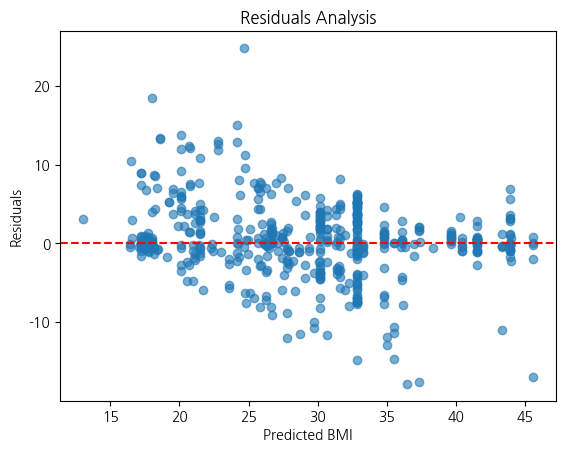

In [130]:
## 잔차 분석 (Residual Plot)

residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted BMI')
plt.ylabel('Residuals')
plt.title('Residuals Analysis')
plt.show()


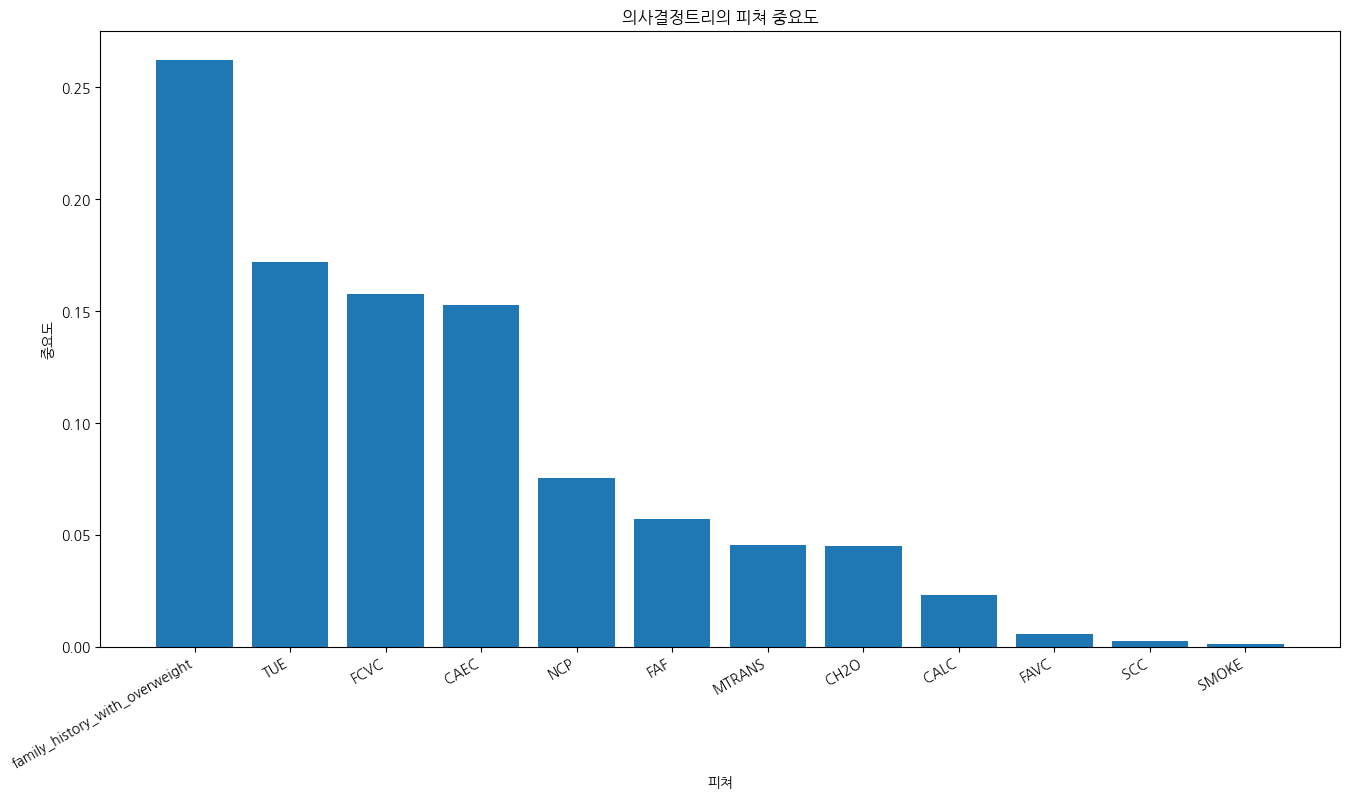

In [139]:
## 피처 중요도 시각화 (Feature Importance)

importances = dt_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(16, 8))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=30, ha='right')
plt.xlabel('피쳐')
plt.ylabel('중요도')
plt.title('의사결정트리의 피쳐 중요도')
plt.show()


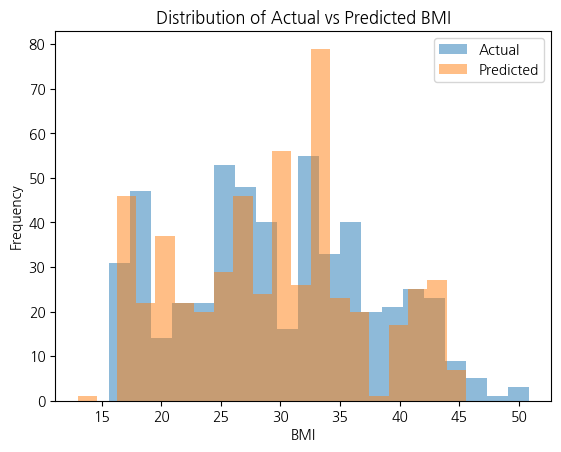

In [142]:
## 히스토그램을 통한 예측값 분포 확인 (Histogram)

plt.hist(y_test, bins=20, alpha=0.5, label='Actual')
plt.hist(y_test_pred, bins=20, alpha=0.5, label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted BMI')
plt.legend()
plt.show()


중요 피쳐만 선택하여 KNN 모델

In [143]:
# 중요 피처 선택
selected_features = ['family_history_with_overweight', 'CAEC', 'FCVC', 'TUE', 'NCP']
X = df[selected_features]
y = df['BMI']

In [144]:
# [3] 탐색적 데이터 분석 (EDA)
print(df[selected_features + ['BMI']].describe())


       family_history_with_overweight         CAEC         FCVC          TUE  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     1.140692     2.418986     0.657861   
std                          0.386247     0.468543     0.533996     0.608926   
min                          0.000000     0.000000     1.000000     0.000000   
25%                          1.000000     1.000000     2.000000     0.000000   
50%                          1.000000     1.000000     2.390000     0.625000   
75%                          1.000000     1.000000     3.000000     1.000000   
max                          1.000000     3.000000     3.000000     2.000000   

               NCP          BMI  
count  2111.000000  2111.000000  
mean      2.685651    29.703255  
std       0.778079     8.016007  
min       1.000000    12.998298  
25%       2.660000    24.325802  
50%       3.000000    28.731747  
75%       3.000000    35.954953  
max    

In [145]:
# [4] 데이터 분리 및 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [147]:
from sklearn.neighbors import KNeighborsRegressor

In [148]:
# [5] KNN 모델 학습
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [167]:
# [6] 모델 평가 및 성능 비교
y_train_pred = knn_regressor.predict(X_train_scaled)
y_test_pred = knn_regressor.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMSE:  {train_rmse:.4f},   Train R²score: {train_r2:.4f}')
print(f'Test  RMSE:  {test_rmse:.4f},   Test  R²score: {test_r2:.4f}')


rmse_diff = train_rmse - test_rmse
r2_diff = train_r2 - test_r2
print('--------------------------------------------')
print(f'diff  RMSE: {rmse_diff:.4f},   diff  R²score: {r2_diff:.4f}')


Train RMSE:  3.9114,   Train R²score: 0.7602
Test  RMSE:  4.9059,   Test  R²score: 0.6328
--------------------------------------------
diff  RMSE: -0.9945,   diff  R²score: 0.1273


In [150]:
# 과적합 여부 체크
if abs(train_r2 - test_r2) > 0.1:
    print("과적합 가능성이 있습니다. 모델 튜닝이 필요합니다.")

과적합 가능성이 있습니다. 모델 튜닝이 필요합니다.


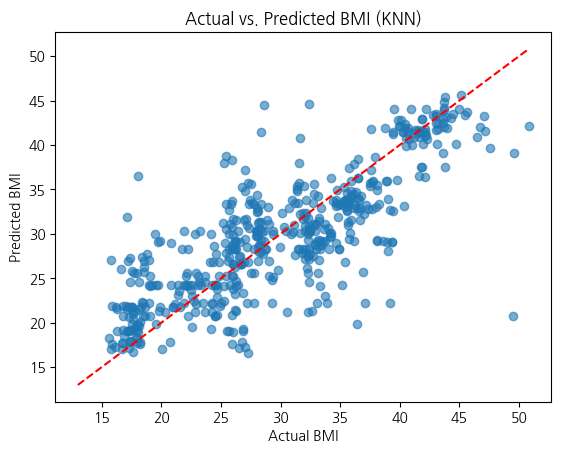

In [151]:
# [7] 결과 시각화 (실제값 vs 예측값)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Actual vs. Predicted BMI (KNN)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [152]:
# [8] 최종 결과 분석
result_df = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'RMSE': [train_rmse, test_rmse],
    'R2 Score': [train_r2, test_r2]
})

print(result_df)

  Dataset      RMSE  R2 Score
0   Train  3.911358  0.760151
1    Test  4.905874  0.632824


과적합 해결 : 튜닝

In [169]:
## K값 조정 (n_neighbors)

knn_regressor2 = KNeighborsRegressor(n_neighbors=10)  # 이웃 수 증가
knn_regressor2.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [170]:
y_train_pred = knn_regressor2.predict(X_train_scaled)
y_test_pred = knn_regressor2.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMSE:  {train_rmse:.4f},   Train R²score: {train_r2:.4f}')
print(f'Test  RMSE:  {test_rmse:.4f},   Test  R²score: {test_r2:.4f}')


rmse_diff = train_rmse - test_rmse
r2_diff = train_r2 - test_r2
print('--------------------------------------------')
print(f'diff  RMSE: {rmse_diff:.4f},   diff  R²score: {r2_diff:.4f}')

Train RMSE:  4.1641,   Train R²score: 0.7281
Test  RMSE:  4.7836,   Test  R²score: 0.6509
--------------------------------------------
diff  RMSE: -0.6195,   diff  R²score: 0.0772


In [179]:
## 가중치 방식 변경 (weights 파라미터)
## -> 기본은 'uniform'이며, 'distance'로 변경하여 거리가 가까운 이웃에 가중치를 더 많이 부여

knn_regressor3 = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_regressor3.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [180]:
y_train_pred = knn_regressor3.predict(X_train_scaled)
y_test_pred = knn_regressor3.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMSE:  {train_rmse:.4f},   Train R²score: {train_r2:.4f}')
print(f'Test  RMSE:  {test_rmse:.4f},   Test  R²score: {test_r2:.4f}')


rmse_diff = train_rmse - test_rmse
r2_diff = train_r2 - test_r2
print('--------------------------------------------')
print(f'diff  RMSE: {rmse_diff:.4f},   diff  R²score: {r2_diff:.4f}')

Train RMSE:  2.3788,   Train R²score: 0.9113
Test  RMSE:  4.7032,   Test  R²score: 0.6625
--------------------------------------------
diff  RMSE: -2.3244,   diff  R²score: 0.2487


In [157]:
## 정규화/스케일링 방법 조정
## -> MinMaxScaler() 등 다른 스케일러를 활용하거나, 데이터를 재분석하여 피처 간의 상대적 중요도를 확인

from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()


In [158]:
## 교차검증을 이용한 최적의 K 찾기
## -> 교차검증(cross-validation)을 통해 최적의 K 값을 찾으면, 일반화 성능을 높일 수 있음

from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(3, 21)}
grid = GridSearchCV(KNeighborsRegressor(), params, cv=5)
grid.fit(X_train_scaled, y_train)

print('최적의 K:', grid.best_params_)
print('최적의 교차검증 점수:', grid.best_score_)


최적의 K: {'n_neighbors': 10}
최적의 교차검증 점수: 0.6707281663630553
